In [1]:
# Task 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings("ignore")

In [2]:
hr_data=pd.read_csv("DS1_C9_S4_Practice_HR_Data.csv")
hr_data

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
hr_data.shape

(14999, 10)

In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
columns=hr_data.columns

In [6]:
def value_counts(col):
    a=col.value_counts()
    print(a)
    print("-----------------------")

In [7]:
for i in columns:
    value_counts(hr_data[i])

satisfaction_level
0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: count, Length: 92, dtype: int64
-----------------------
last_evaluation
0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: count, Length: 65, dtype: int64
-----------------------
number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64
-----------------------
average_monthly_hours
135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: count, Length: 215, dtype: int64
-----------------------
time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64
-----------------------
Work_accident
0    12830
1     2169
Name: count, dtype: int64
-----------------------
lef

In [8]:
# Task 2
bins=[-1,0,1]
labels=["Not leaving the company","Leaving the company"]
hr_data["left_c"]=pd.cut(hr_data["left"],bins=bins,labels=labels)
hr_data

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,left_c
0,0.38,0.53,2,157,3,0,1,0,sales,low,Leaving the company
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Leaving the company
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Leaving the company
3,0.72,0.87,5,223,5,0,1,0,sales,low,Leaving the company
4,0.37,0.52,2,159,3,0,1,0,sales,low,Leaving the company
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,Leaving the company
14995,0.37,0.48,2,160,3,0,1,0,support,low,Leaving the company
14996,0.37,0.53,2,143,3,0,1,0,support,low,Leaving the company
14997,0.11,0.96,6,280,4,0,1,0,support,low,Leaving the company


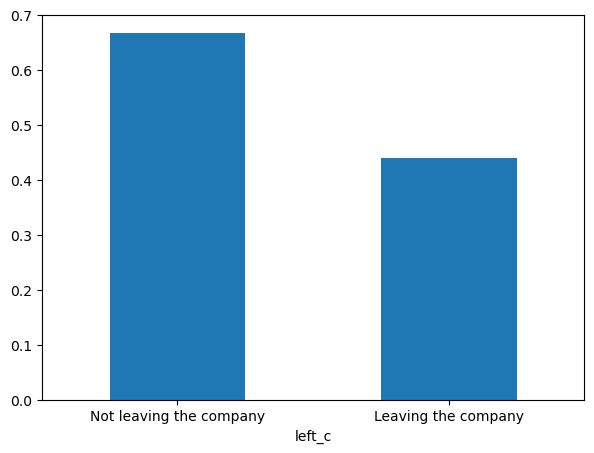

In [9]:
#  Task 2(1)
hr_data.groupby(["left_c"])["satisfaction_level"].mean().plot(kind="bar")
plt.gcf().set_size_inches(7,5)
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='left_c', ylabel='satisfaction_level'>

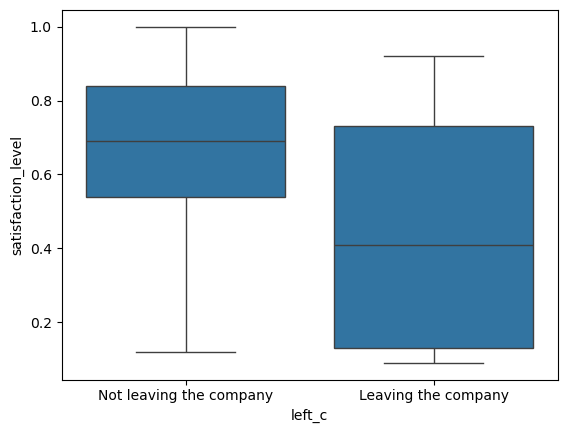

In [10]:
sns.boxplot(x="left_c",y="satisfaction_level",data=hr_data)

<Axes: xlabel='left_c'>

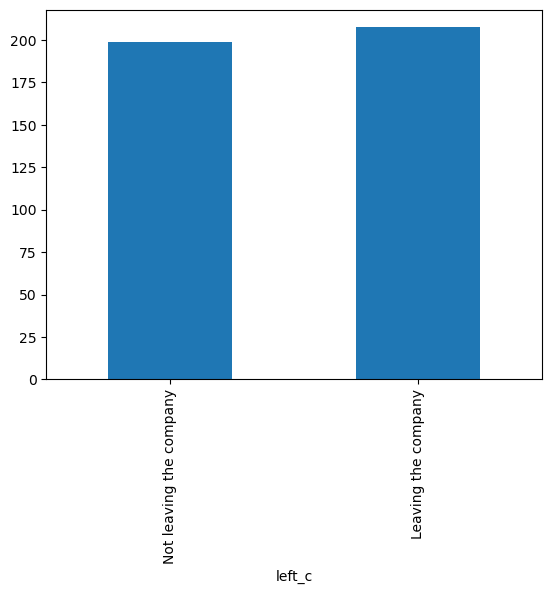

In [11]:
# Task 2(2)
hr_data.groupby(["left_c"])["average_monthly_hours"].mean().plot(kind="bar")

<Axes: xlabel='salary'>

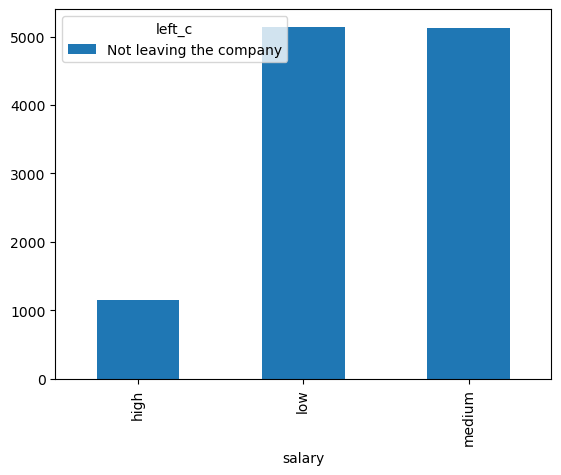

In [12]:
# Task 2(3)
not_left=hr_data[hr_data["left_c"]=="Not leaving the company"]
not_left
pd.crosstab(not_left['salary'],not_left['left_c']).plot(kind="bar")

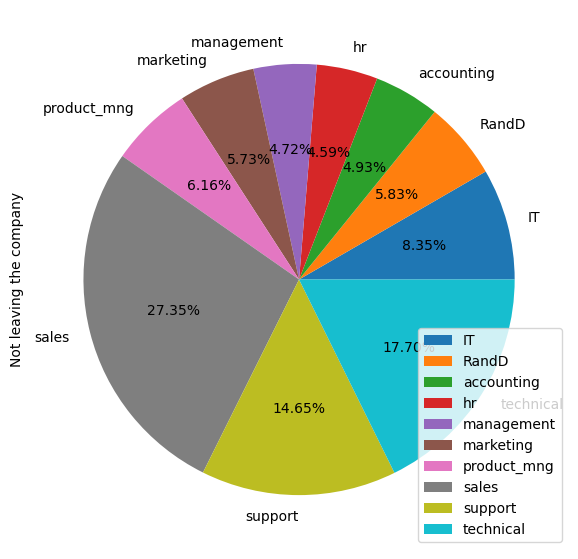

In [13]:
# Task 2(4)
not_left=hr_data[hr_data["left_c"]=="Not leaving the company"]
not_left
pd.crosstab(not_left["Department"],not_left["left_c"]).plot(kind="pie",subplots=True,autopct="%.2f%%",figsize=(10,7))
plt.show()

In [14]:
# Task 3
label_encoder=preprocessing.LabelEncoder()
hr_data["Department_encoder"]=label_encoder.fit_transform(hr_data["Department"])
hr_data["salary_encoder"]=label_encoder.fit_transform(hr_data["salary"])

In [15]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
left_c                   0
Department_encoder       0
salary_encoder           0
dtype: int64

In [16]:
cat_columns=hr_data.loc[:,["salary","Department","left_c"]]
hr_data=hr_data.drop(["salary","Department","left_c"],axis=1)
hr_data

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_encoder,salary_encoder
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [17]:
hr_data["left"].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

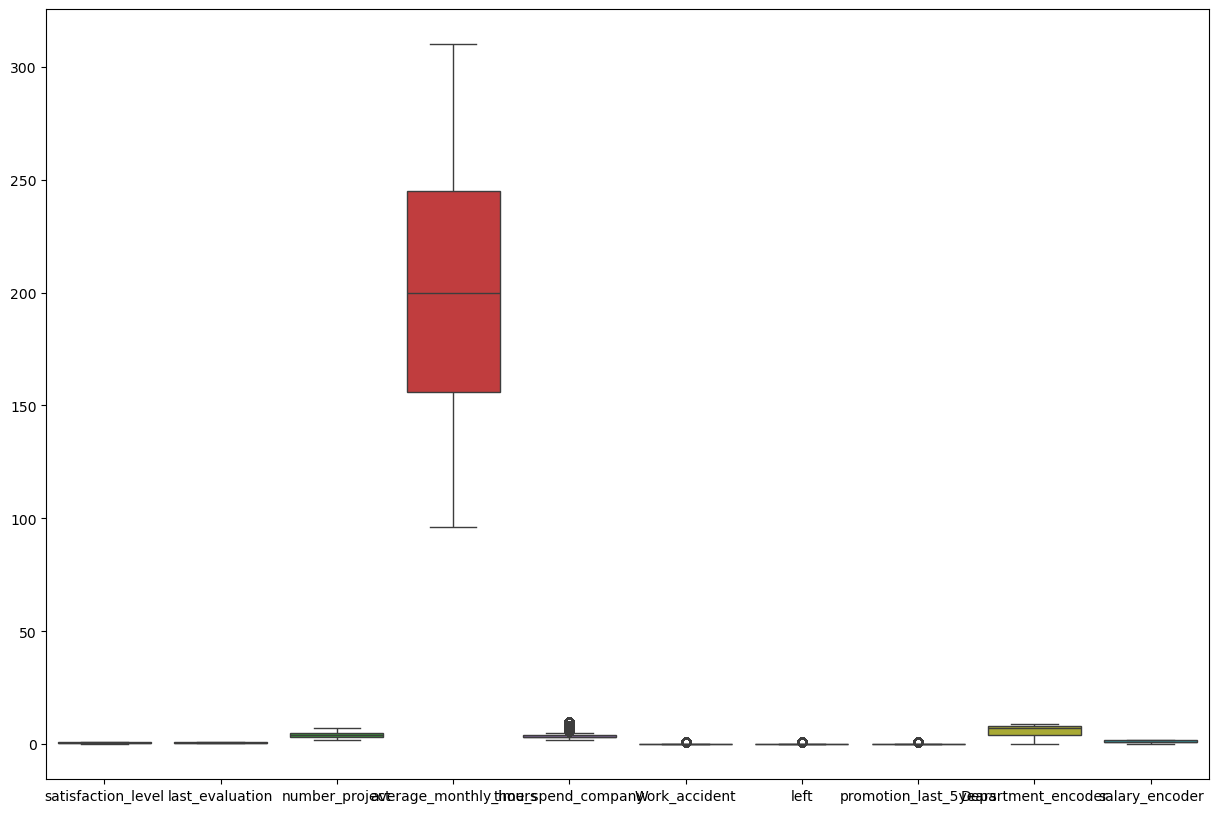

In [18]:
sns.boxplot(data=hr_data)
plt.gcf().set_size_inches(15,10)
plt.show()

In [19]:
data=[]
for col in hr_data:
    UO=[]
    LO=[]
    column_df=pd.Series(hr_data[col])
    Max=max(column_df)
    Min=min(column_df)
    Range=Max-Min
    Q1=column_df.quantile(0.25)
    Q2=column_df.quantile(0.50)
    Q3=column_df.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in hr_data[col]:
        if z>UF:
            UO.append(z)
        elif z<LF:
            LO.append(z)
    data.append((col,Max,Min,Range,Q1,Q2,Q3,IQR,UF,LF,[UO,LO]))
columns_names=["Columns","Maximum","Minimum","Range","Q1","Q2","Q3","IQR","UF","LF","Outliers"]
datas=pd.DataFrame(data,columns=columns_names)
datas

,Columns,Maximum,Minimum,Range,Q1,Q2,Q3,IQR,UF,LF,Outliers
0,satisfaction_level,1.0,0.09,0.91,0.44,0.64,0.82,0.38,1.390,-0.130,"[[], []]"
1,last_evaluation,1.0,0.36,0.64,0.56,0.72,0.87,0.31,1.335,0.095,"[[], []]"
2,number_project,7.0,2.00,5.00,3.00,4.00,5.00,2.00,8.000,0.000,"[[], []]"
3,average_monthly_hours,310.0,96.00,214.00,156.00,200.00,245.00,89.00,378.500,22.500,"[[], []]"
4,time_spend_company,10.0,2.00,8.00,3.00,3.00,4.00,1.00,5.500,1.500,"[[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,..."
5,Work_accident,1.0,0.00,1.00,0.00,0.00,0.00,0.00,0.000,0.000,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
6,left,1.0,0.00,1.00,0.00,0.00,0.00,0.00,0.000,0.000,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
7,promotion_last_5years,1.0,0.00,1.00,0.00,0.00,0.00,0.00,0.000,0.000,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
8,Department_encoder,9.0,0.00,9.00,4.00,7.00,8.00,4.00,14.000,-2.000,"[[], []]"
9,salary_encoder,2.0,0.00,2.00,1.00,1.00,2.00,1.00,3.500,-0.500,"[[], []]"


In [20]:
# def iqr_winsorization(df):
#     df_c=df.copy()
#     col_to_treat=df_c.columns
#     for col in col_to_treat:
#         Q1=df_c[col].quantile(0.25)
#         Q2=df_c[col].quantile(0.50)
#         Q3=df_c[col].quantile(0.75)
#         IQR=Q3-Q1
#         UF=Q3+1.5*IQR
#         LF=Q1-1.5*IQR
#         df_c.loc[df_c[col]>UF,col]=UF
#         df_c.loc[df_c[col]<LF,col]=LF
#     return df_c
# df=pd.DataFrame(hr_data)
# treated_df=iqr_winsorization(df.copy())

In [21]:
# sns.boxplot(data=treated_df)
# plt.gcf().set_size_inches(15,10)
# plt.show()

If we treated the outliers the values are becoming zero.For example the columns like left ,work accident which contains the values like 0 and 1 if we treated all the values become 0. so i didn't treat outliers.

In [23]:
left=hr_data["left"] # Target Value
hr_data=hr_data.drop(["left"],axis=1)

In [24]:
scale=StandardScaler()
df_scaled=scale.fit_transform(hr_data)
df_scaled=pd.DataFrame(df_scaled,columns=hr_data.columns)
df_scaled

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_encoder,salary_encoder
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,0.393725,-0.554955
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.393725,1.043004
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.393725,1.043004
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,0.393725,-0.554955
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,0.393725,-0.554955
...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412,0.742316,-0.554955
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412,0.742316,-0.554955
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412,0.742316,-0.554955
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412,0.742316,-0.554955


In [25]:
corr=abs(df_scaled>=0.7)
corr

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_encoder,salary_encoder
0,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,False,False,False,True
2,False,True,True,True,False,False,False,False,True
3,False,True,True,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,True,False
14995,False,False,False,False,False,False,False,True,False
14996,False,False,False,False,False,False,False,True,False
14997,False,True,True,True,False,False,False,True,False


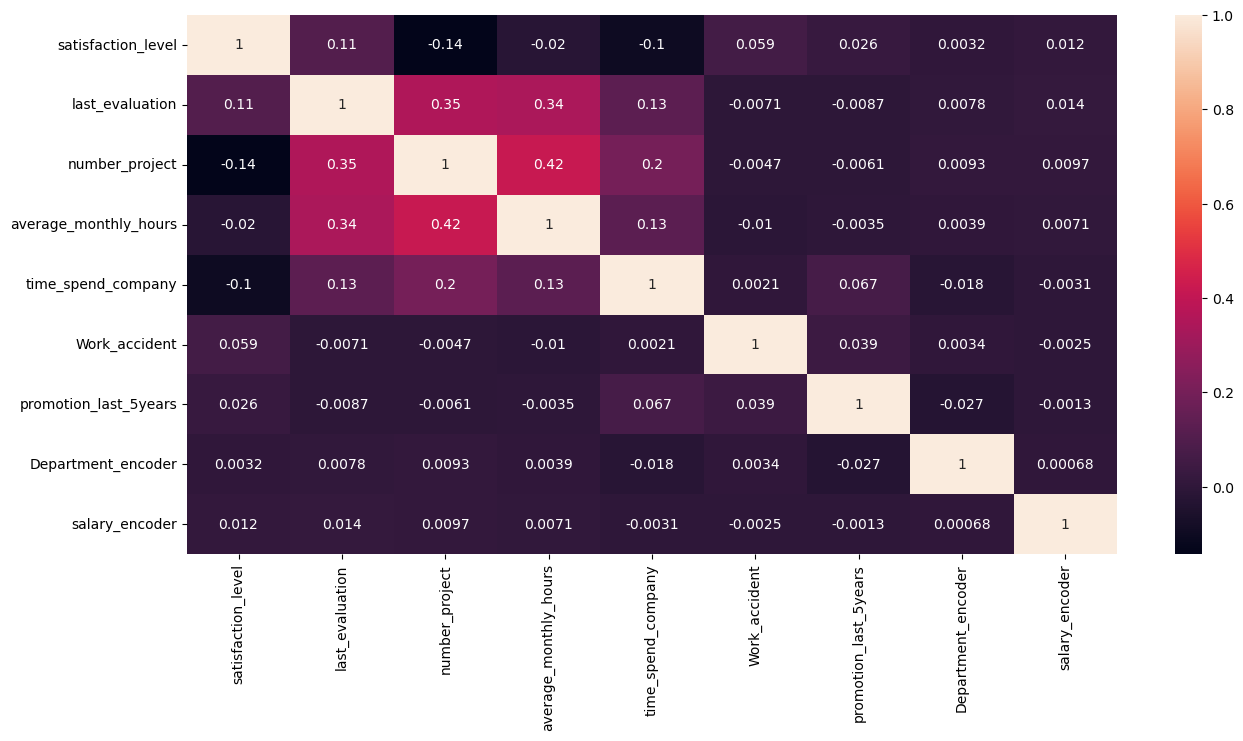

In [26]:
sns.heatmap(df_scaled.corr(),annot=True)
plt.gcf().set_size_inches(15,7)

In [27]:
df_scaled=pd.concat([left,df_scaled],axis=1)
df_scaled

,left,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_encoder,salary_encoder
0,1,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,0.393725,-0.554955
1,1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.393725,1.043004
2,1,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.393725,1.043004
3,1,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,0.393725,-0.554955
4,1,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,0.393725,-0.554955
...,...,...,...,...,...,...,...,...,...,...
14994,1,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412,0.742316,-0.554955
14995,1,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412,0.742316,-0.554955
14996,1,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412,0.742316,-0.554955
14997,1,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412,0.742316,-0.554955


In [28]:
# Task 4
hr_train,hr_test=train_test_split(df_scaled,train_size=0.8 ,random_state=200)
print("Hr train shape:",hr_train.shape)
print("Hr test shape:",hr_test.shape)

Hr train shape: (11999, 10)
Hr test shape: (3000, 10)


In [29]:
hr_train

,left,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_encoder,salary_encoder
1704,1,-0.936495,-1.320970,-1.462863,-1.222439,-0.341235,-0.411165,-0.147412,0.393725,1.043004
1638,1,-0.775608,-0.970428,-1.462863,-1.102298,-0.341235,-0.411165,-0.147412,-1.000639,-0.554955
2280,0,0.149490,-0.210920,0.159788,-1.462720,1.028546,-0.411165,-0.147412,0.045134,-0.554955
3573,0,0.591928,0.022775,0.159788,1.300517,-0.341235,-0.411165,-0.147412,-2.046413,1.043004
4730,0,0.310376,1.074402,1.782438,0.459532,0.343655,-0.411165,6.783716,-1.697822,-0.554955
...,...,...,...,...,...,...,...,...,...,...
11050,0,0.431041,-1.028852,0.159788,0.359414,-1.026126,-0.411165,-0.147412,1.090907,1.043004
14148,0,0.833258,0.139622,-0.651538,0.559649,2.398327,-0.411165,6.783716,-0.652048,-2.152913
784,1,-0.695165,-0.853580,-1.462863,-1.402650,-0.341235,-0.411165,-0.147412,0.393725,-0.554955
12905,0,1.436582,1.074402,0.971113,1.220423,-0.341235,-0.411165,-0.147412,0.393725,1.043004


In [30]:
X_train=hr_train.drop(columns="left",axis=1)
X_test=hr_test.drop(columns="left",axis=1)
y_train=hr_train["left"]
y_test=hr_test["left"]

In [31]:
print("X train Shape:",X_train.shape)
print("X test Shape:", X_test.shape)
print("y train Shape:",y_train.shape)
print("y test Shape:",y_test.shape)

X train Shape: (11999, 9)
X test Shape: (3000, 9)
y train Shape: (11999,)
y test Shape: (3000,)


In [32]:
s_model=LogisticRegression().fit(X_train,y_train)
s_model

LogisticRegression()

In [33]:
y_pred=s_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Confusion Matrix: [[2096  145]
 [ 558  201]]


In [35]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

2096 145 558 201


In [36]:
# Task 5
print("Recall score:",recall_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Precision score:",precision_score(y_test,y_pred))

Recall score: 0.2648221343873518
F1 score: 0.36380090497737555
Accuracy score: 0.7656666666666667
Precision score: 0.5809248554913294


In [37]:
from sklearn.metrics import roc_auc_score

In [38]:
roc=roc_auc_score(y_test,s_model.predict_proba(X_test)[:,1])
print("ROC SCORE:",roc)

ROC SCORE: 0.8102120089198839


In [39]:
from sklearn.metrics import RocCurveDisplay

<Figure size 1500x700 with 0 Axes>

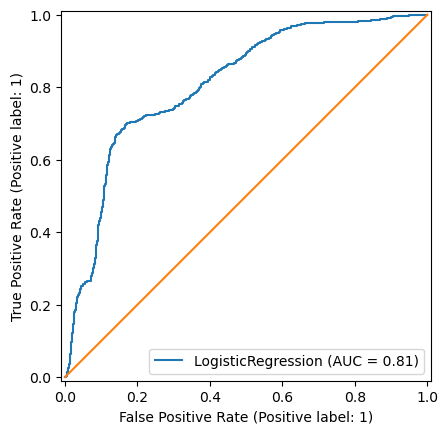

In [40]:
plt.figure(figsize=(15,7))
RocCurveDisplay.from_estimator(s_model,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

Overall Interpretation:
The accuracy score of 76.57% indicates that the logistic regression model correctly classifies most instances but may not be well-balanced across classes. The precision score (0.581) suggests that when the model predicts a positive class, it is correct 58.1% of the time, while the recall score (0.265) shows that it captures only 26.5% of actual positive cases, indicating possible under-detection. The F1 score (0.364) balances precision and recall, but the low value suggests an imbalance. To improve recall, consider adjusting the decision threshold, handling class imbalance, or using more features.